In [1]:
## Bring in needed mods
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
## Set path to data of newest progeny sequenced
path2 = '../PHENOTYPE/RAW/202105_Samples_for_Illumina_ForCullen.xlsx'

## Load ind ataframe of newest set
df2 = pd.read_excel(path2)

## Drop columns we don't need for QTL analysis
df2.drop(['Notes','Sample ID','ID','Species'],
         inplace=True,axis=1)

## Add a basidum column
df2['Basidium'] = np.nan

## Rename columns
df2.columns = ['Strain','Phenotype_Short','Basidium']

## Add variable for set
df2['Set'] = 1

## View head
df2.head()

,Strain,Phenotype_Short,Basidium,Set
0,NIH12,N,NaN,1
1,NIH433,N,NaN,1
2,I641,N,NaN,1
3,I643,N,NaN,1
4,I645,N,NaN,1


In [3]:
## Set path to data 
path1 = '../PHENOTYPE/RAW/202011_WGS_B3502Progeny_for_QTL.xlsx'

## load in dataframe of original set
df1 = pd.read_excel(path1)

## Drop columns we don't need for QTL analysis
df1.drop(['Notes','Cross_Progeny'],axis=1,inplace=True)

## rename columns
df1.columns = ['Strain','Basidium','Phenotype_Short']

## Add variable for set 
df1['Set'] = 0

## View tail
df1.tail()

,Strain,Basidium,Phenotype_Short,Set
52,B_09,NaN,N,0
53,B_10,NaN,N,0
54,B_11,NaN,T,0
55,B_12,NaN,N,0
56,B_20 **,NaN,Y,0


In [4]:
## concatinate data and reset index
df = pd.concat([df1,df2]).reset_index(drop=True)

## Edit strainame B_20
df.loc[(df.Strain=='B_20 **'),'Strain'] = 'B_20'

## Check unique number of smaples
assert df.Strain.unique().shape[0] == df.shape[0]

## Print shape
df.shape

(82, 4)

In [5]:
## Print the unique phenotypes
df.Phenotype_Short.unique()

array(['N', 'Y', 'L', 'N (with rare spots of T)', 'T'], dtype=object)

In [6]:
## Set filamentous notes based on phenotypes above
fillnotes = ['Yeast','Selfing','Large Cell','Yeast with rare selfing','Transgressive Selfing']

## Make a dictionary for filamentous phenoytpe
filldict = dict(zip(df.Phenotype_Short.unique(),fillnotes))

## Add a phenotype description
df['Phenotype_Description'] = df.Phenotype_Short.replace(filldict)

## VIew head
df.head()

,Strain,Basidium,Phenotype_Short,Set,Phenotype_Description
0,A_01,1.0,N,0,Yeast
1,A_02,1.0,Y,0,Selfing
2,A_03,1.0,N,0,Yeast
3,A_04,1.0,L,0,Large Cell
4,A_05,2.0,N (with rare spots of T),0,Yeast with rare selfing


In [7]:
df[(df.Phenotype_Description=='Yeast with rare selfing')]

,Strain,Basidium,Phenotype_Short,Set,Phenotype_Description
4,A_05,2.0,N (with rare spots of T),0,Yeast with rare selfing
48,B_05,NaN,N (with rare spots of T),0,Yeast with rare selfing
74,B_26,NaN,N (with rare spots of T),1,Yeast with rare selfing
80,B_32,NaN,N (with rare spots of T),1,Yeast with rare selfing


In [8]:
## Count phenotypes
pheno_count = df.groupby(df.Phenotype_Description).count().sort_values('Strain')

## Set xlables
xlabels = []

## Iterate thru index
for x in pheno_count.index:
    
    ## Split if with is in phenotype name
    if len(x.split(" with")) > 1:
        
        ## Split
        nx = '\nwith'.join(x.split(' with'))
    
    else:
        
        ## Don't split
        nx = x
        
    ## append x
    xlabels.append(nx)

## Print counts
pheno_count

,Strain,Basidium,Phenotype_Short,Set
Phenotype_Description,,,,
Yeast with rare selfing,4,1,4,4
Transgressive Selfing,7,4,7,7
Selfing,13,11,13,13
Large Cell,20,8,20,20
Yeast,38,20,38,38


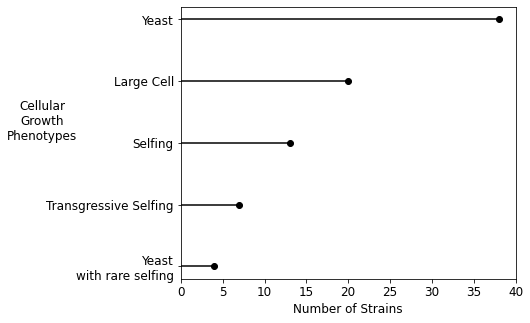

In [9]:
## Draw figure of phenotype
## call figure and set face-color
fig,ax = plt.subplots(1,1,figsize=(6,5))
fig.set_facecolor('w')

## Set plot varialbes
color = 'k'
fontsize = 12
ymax = 40

## Plot distribution of phenotypes
plt.plot(pheno_count.Strain.values,range(pheno_count.shape[0]),'o',color=color);

plt.hlines(range(len(fillnotes)),np.zeros(len(fillnotes)),
           pheno_count.Strain.values,color=color);

## Modify y-axis
plt.xlabel('Number of Strains',fontsize=fontsize);
plt.xlim(0,ymax)
plt.xticks(fontsize=fontsize);

## Modify x-axis
plt.yticks(range(len(fillnotes)),xlabels,rotation=0,fontsize=fontsize)
plt.ylabel('Cellular\nGrowth\nPhenotypes',rotation=0,fontsize=fontsize);

In [10]:
## print phenotype description
fillnotes

['Yeast',
 'Selfing',
 'Large Cell',
 'Yeast with rare selfing',
 'Transgressive Selfing']

In [11]:
## Binary phenotype:
## Yeast, non-filamentous, and non-filamentous with rare ... 
## vs everything else; filamentous, hyper-filamentous,and giant cells 
binary_dict = dict(zip(fillnotes,[0,1,1,0,1]))
df['Binary'] = df.Phenotype_Description.replace(binary_dict)

## Trinary phenotype:
## Yeast, non-filamentous, and non-filamentous with rare ...  
## giant cells and
## filamentous + hyper-filamentous
trinary_dict = dict(zip(fillnotes,[0,2,1,0,2]))
df['Trinary'] = df.Phenotype_Description.replace(trinary_dict)

## Guadrary phenotype:
## Yeast / non-filamentous 
## Large cells
## Filamentous
## Hyper-filamentous + (non-filamentous with rare)
quad_dict = dict(zip(fillnotes,[0,2,1,3,3]))
df['Quaternary'] = df.Phenotype_Description.replace(quad_dict)

## Full set of phenotypes
## The five descret phenotypic classes (as seen above)
five_dict = dict(zip(fillnotes,[0,2,1,4,3]))
df['Pentary'] = df.Phenotype_Description.replace(five_dict)

## View head
df.head()

,Strain,Basidium,Phenotype_Short,Set,Phenotype_Description,Binary,Trinary,Quaternary,Pentary
0,A_01,1.0,N,0,Yeast,0,0,0,0
1,A_02,1.0,Y,0,Selfing,1,2,2,2
2,A_03,1.0,N,0,Yeast,0,0,0,0
3,A_04,1.0,L,0,Large Cell,1,1,1,1
4,A_05,2.0,N (with rare spots of T),0,Yeast with rare selfing,0,0,3,4


In [12]:
## Add parents data
df.loc[82,:] = ['B3502_A1',np.nan,'Y',2,'Selfing',1,2,2,2]
df.loc[83,:] = ['B3502_B1',np.nan,'Y',2,'Selfing',1,2,2,2]
df.loc[84,:] = ['CF830',np.nan,'N',0,'Yeast',0,0,0,0]

In [13]:
## Drop data
## Remove the ancestorial strians
remove_ancestors_ix = df[(df.Strain.isin(['NIH12','NIH433']))].index.tolist()

## We are dropping the "yeast with rare selfing" because 
## there are only a few of these and they have a 
## transiant phenotype
remove_transiant_ix = df[(df.Pentary==4)].index.tolist()

## append remove lists print length of rows being dropped
remove_ix = remove_ancestors_ix+remove_transiant_ix

## View rows being dropped
df.loc[remove_ix].T.head().T.head(len(remove_ix))

,Strain,Basidium,Phenotype_Short,Set,Phenotype_Description
57,NIH12,NaN,N,1,Yeast
58,NIH433,NaN,N,1,Yeast
4,A_05,2,N (with rare spots of T),0,Yeast with rare selfing
48,B_05,NaN,N (with rare spots of T),0,Yeast with rare selfing
74,B_26,NaN,N (with rare spots of T),1,Yeast with rare selfing
80,B_32,NaN,N (with rare spots of T),1,Yeast with rare selfing


In [14]:
## Drop unneed rows and columns
sdf = df.drop(remove_ix,axis=0).drop("Pentary",axis=1)

## Save
sdf.to_csv('../PHENOTYPE/PROCESSED/Cellsize_shape_phenotype.csv.gz',index=False)